# Table of Contents
### 01. Import Merged Data
### 02. PII
### 03. Spending Habits Between Regions
### 04. Creating Segmentation
### 05. Customer Profiling
### 06. Visualizations
### 07. Aggregate Frequency of Usage and Expenditure.
### 08&09. Customers Profiles Across Regions and Departments with Visualizations
### 10. Export Data

# Question 1. Importing Merged Data

In [16]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [17]:
#pathway to dataframes
path = r'C:\Users\ajkap\Instacart Basket Analysis'

In [18]:
#Importing 'ords_prods_merged_aggregated_2_.pkl'
df_merged_clean = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged_aggregated_2_.pkl'))

## Sensitive customer data such as their names, address, email and any other personally identifiable information should be deleted. Upper management can also instruct on how to handle PII information in the data.

# Question 2. PII

In [4]:
# checking dataframe information
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32406041 entries, 0 to 32406040
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   first_name              object  
 2   last_name               object  
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   n_dependants            int64   
 8   fam_status              object  
 9   income                  int64   
 10  order_id                int64   
 11  eval_set                object  
 12  order_number            int64   
 13  order_dow               int64   
 14  order_hour_of_day       int64   
 15  days_since_prior_order  float64 
 16  product_id              int64   
 17  add_to_cart_order       int64   
 18  reordered               int64   
 19  Unnamed: 0_y            int64   
 20  product_name            object  
 21  aisle_

In [9]:
# Dropping first and last name (PII) columns from dataframe.
df_merged_clean = df_merged_clean.drop(columns = ['first_name', 'last_name'])

In [10]:
#Checking the dataframe
df_merged_clean.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,eval_set,...,busiest_day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,Regularly busy,Busiest days,Most_orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Regularly busy,Regularly busy days,Most_orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,Regularly busy,Busiest days,Most_orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Regularly busy,Regularly busy days,Most_orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,Regularly busy,Least busy days,Most_orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


# 3. Spending Habits between Regions

In [10]:
#Check spending habits between regions
spending_habits = pd.crosstab(df_merged_clean['region'], df_merged_clean['spending_flag'], dropna = False)

(None, Text(0.5, 1.0, 'Regional Spending Habit'))

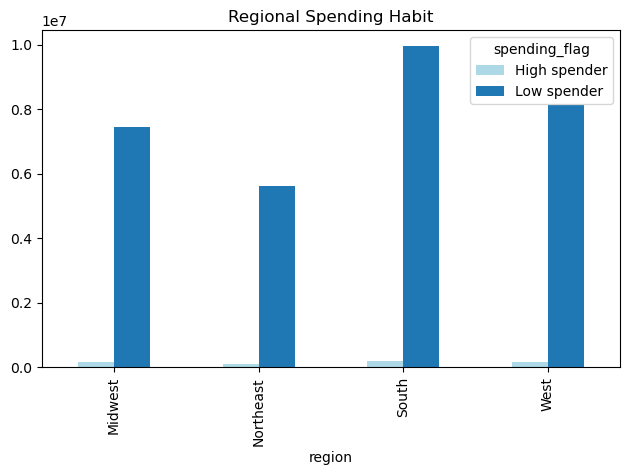

In [11]:
spending_habits_viz=spending_habits.plot.bar(color=['lightblue','tab:blue'])
plt.tight_layout(), plt.title('Regional Spending Habit')

In [12]:
# exporting the above visualization
spending_habits_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','regional_spending_habits.png'))

# Question 4. Creating Segmentation

In [67]:
# Checking new column.
df_merged_clean[['user_id', 'region', 'state']].head(20)

,user_id,region,state
0,26711,Midwest,Missouri
1,26711,Midwest,Missouri
2,26711,Midwest,Missouri
3,26711,Midwest,Missouri
4,26711,Midwest,Missouri
5,26711,Midwest,Missouri
6,26711,Midwest,Missouri
7,26711,Midwest,Missouri
8,26711,Midwest,Missouri
9,26711,Midwest,Missouri


In [1]:
#Defining Regions
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan','Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Oklahoma','Texas', 'Arkansas', 'Louisiana', 'Alabama']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [6]:
# Creating region column base on state column.
df_merged_clean.loc[df_merged_clean['state'].isin (Northeast), 'region'] = 'Northeast'
df_merged_clean.loc[df_merged_clean['state'].isin (Midwest), 'region'] = 'Midwest'
df_merged_clean.loc[df_merged_clean['state'].isin (South), 'region'] = 'South'
df_merged_clean.loc[df_merged_clean['state'].isin (West), 'region'] = 'West'

In [9]:
df_merged_clean['region'].value_counts()

South        10150868
West          8293217
Midwest       7597585
Northeast     5722939
Name: region, dtype: int64

In [8]:
#Check shape
df_merged_clean.shape

(32406041, 36)

# Question 4. Excluding low activity customers

In [4]:
df_merged_clean.shape

(32406041, 35)

In [5]:
df_merged_clean.loc[df_merged_clean['max_order'] >= 5, 'customer_activity'] = 'High_activity_customers'

In [6]:
#Creating flag for low activity customers
df_merged_clean.loc[df_merged_clean['max_order']<5, 'customer_activity'] = 'Low_activity_customers'

In [7]:
#Checking value counts of customer_activity column
df_merged_clean['customer_activity'].value_counts(dropna= False)

High_activity_customers    30965686
Low_activity_customers      1440355
Name: customer_activity, dtype: int64

In [12]:
# Creating a Subset of low active customers._
low_active_customers = df_new[df_new['customer_activity'] == 'Low_activity_customers']

In [18]:
low_active_customers.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge,region,customer_activity
729,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712,...,Average_orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,both,South,Low_activity_customers
730,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712,...,Most_orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,both,South,Low_activity_customers
731,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712,...,Average_orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,both,South,Low_activity_customers
732,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712,...,Average_orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,both,South,Low_activity_customers
733,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712,...,Most_orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,both,South,Low_activity_customers


In [19]:
low_active_customers.shape

(1440355, 37)

In [20]:
# exporting the Low-activity customers subset
low_active_customers.to_pickle(os.path.join(path,'02 Data','Prepared Data','Low_activity_customers.pkl'))

In [21]:
# creating a subset for the High-activity customers
high_active_customers=df_merged_clean[df_merged_clean['customer_activity']=='High_activity_customers']

In [22]:
#Checking shape
high_active_customers.shape

(30965686, 37)

In [23]:
# Exporting 'high_active_customers' dataframe
high_active_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_active_customers.pkl'))

# Question 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [4]:
# Contuning the analysis with new 'high_active_customers' Dataframe.
df_new = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_active_customers.pkl'))

In [25]:
#Checking frequency of age column
df_new['age'].describe()

count    3.096569e+07
mean     4.946800e+01
std      1.848526e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [38]:
#Creating a new column for age category 
df_new.loc[(df_new['age'] >35) & (df_new['age'] <60), 'age_category'] = 'Middle Age'

In [39]:
#Creating 'Senior Citizens' column
df_new.loc[df_new['age']>60, 'age_category'] = 'Senior Citizens'

In [40]:
#Creating 'Young Age' column
df_new.loc[df_new['age'] <=35, 'age_category'] = 'Young Age'

In [37]:
df_new['age_category'].value_counts(dropna=False)

Middle Age         11651716
Senior Citizens    10112938
Young Age           8739122
NaN                  461910
Name: age_category, dtype: int64

In [30]:
df_new.shape

(30965686, 38)

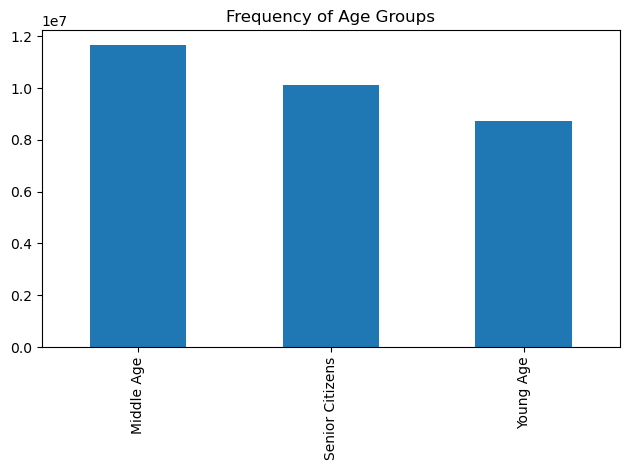

In [38]:
# creating a visualization
age_grp_bar=df_new['age_category'].value_counts().plot.bar(title='Frequency of Age Groups'), plt.tight_layout()

In [39]:
# exporting the visualization
plt.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'frequency_of_age_groups.png')), plt.tight_layout()

(None, None)

<Figure size 640x480 with 0 Axes>

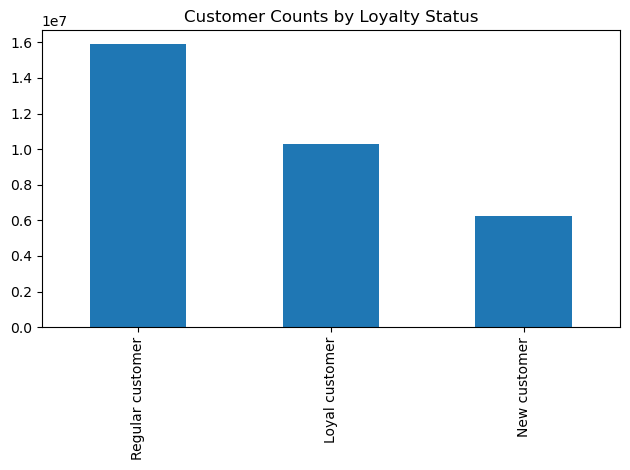

In [95]:
# Create a bar chart from the "loyalty_flag" column

bar_loyalty = df_merged_clean['loyalty_flag'].value_counts().plot.bar(title = 'Customer Counts by Loyalty Status' ), plt.tight_layout()

In [100]:
#Exporting bar_loyalty chart
plt.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_loyalty.png')), plt.tight_layout()

(None, None)

<Figure size 640x480 with 0 Axes>

## Income of Customers

In [32]:
#Check frequency of 'income' column
df_new['income'].describe()

count    3.096569e+07
mean     9.967573e+04
std      4.314168e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [34]:
#Check
df_new.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge,region,customer_activity,age_category
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High_activity_customers,Middle Age
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High_activity_customers,Middle Age
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High_activity_customers,Middle Age
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High_activity_customers,Middle Age
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High_activity_customers,Middle Age


In [36]:
# Creating 'Low Income' column
df_new.loc[(df_new['income'] >=25900) & (df_new['income'] <75000), 'income_groups'] = 'Low Income'
df_new.loc[(df_new['income'] >=75000) & (df_new['income'] <150000), 'income_groups'] = 'Medium Income'
df_new.loc[(df_new['income'] > 150000), 'income_groups'] = 'High Income'

In [20]:
#Checking result
df_new['income_groups'].value_counts(dropna=False)

Medium Income    17163226
Low Income        9907061
High Income       3894658
NaN                   741
Name: income_groups, dtype: int64

## Department

In [5]:
#Importing 'departments_wrangled.csv'
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [7]:
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [6]:
# Rename column.
df_dep = df_dep.rename(columns = {'Unnamed: 0': 'department_id'})

In [8]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [12]:
#Dropping 'merge' column
df_new= df_new.drop(columns = ['_merge'])

In [12]:
n =  500000
list_df = [df_dep[i:i+n] for i in range(0,len(df_dep),n)]

In [29]:
df_merged_clean.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', '_merge'],
      dtype='object')

In [30]:
df_dep.columns

Index(['department_id', 'department'], dtype='object')

In [15]:
df_new.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', 'region', 'customer_activity'],
      dtype='object')

frames = []
for frame in list_df:
    df_full = frame.merge(df_dep, right_on='department_id', left_on='department', indicator=True)
    frames.append(df_full)
df_full = pd.concat(frames)

In [27]:
df_dep.columns

Index(['department_id', 'department'], dtype='object')

In [7]:
# merging 'df_dep' dataframe with the 'df_merged_clean' dataframe
df_merged = df_new.merge(df_dep, on = 'department_id')

# Merging the departments dataframe with high_active_customers dataframe.
df_merged_ = df_new.merge(df_dep, on = 'department')

In [ ]:
# checking the merge result.
df_merged[['user_id', 'department_id', 'department']].head()

In [34]:
df_merged.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', '_merge', 'region', 'customer_activity',
       'department'],
      dtype='object')

## Dependents

In [11]:
# Checking the frequency of dependents column.de
df_merged_clean['n_dependants'].describe()

count    3.240604e+07
mean     1.501891e+00
std      1.118866e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [ ]:
# checking marital status column.
df_merged_clean['fam_status'].value_counts(dropna = False)

In [19]:
# Creating flag for number of dependents in a household.

df_merged.loc[(df_merged['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['n_dependants'] ==0), 'customer_profile'] = 'Single adult'

df_merged.loc[(df_merged['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['n_dependants'] >0), 'customer_profile'] = 'Young parent'

df_merged.loc[(df_merged['fam_status']=='married') & (df_merged['n_dependants'] <=2), 'customer_profile'] = 'Family'

df_merged.loc[(df_merged['fam_status']=='married') & (df_merged['n_dependants'] >2), 'customer_profile'] = 'Big Family'

In [14]:
#Checking results
df_merged[['fam_status', 'n_dependants', 'customer_profile']].head()

NameError: name 'df_merged' is not defined

In [49]:
df_merged_clean['customer_profile'].value_counts(dropna=False)

Family          15134612
Single adult     8097859
Big Family       7622929
Young parent     1550641
Name: customer_profile, dtype: int64

In [ ]:
#Checking shape of merged column
df_merged.shape

# 6. Visualizations

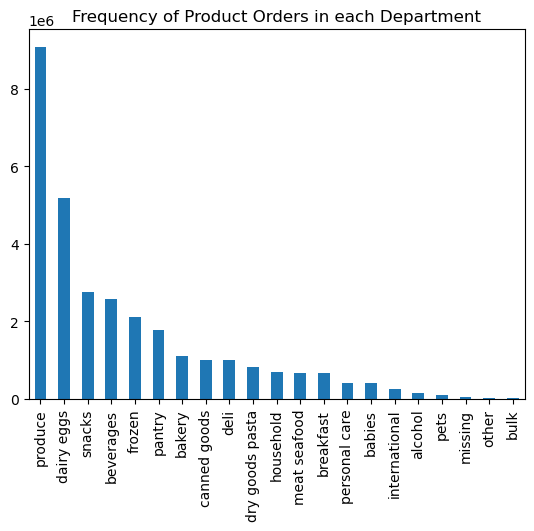

In [15]:
# creating a bar chart for the 'department' column

bar_dept=df_merged['department'].value_counts().plot.bar(title='Frequency of Product Orders in each Department')


In [16]:
# Exporting bar chart
bar_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments.png')), plt.tight_layout

(None,
 <function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>)

Text(0.5, 1.0, 'Distribution of Age Groups')

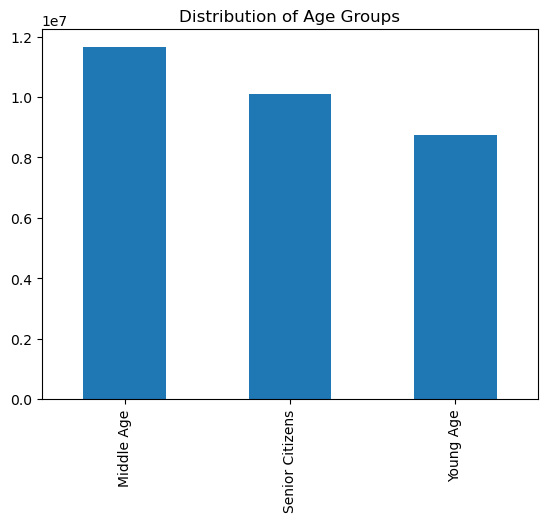

In [40]:
# Creating bar chart for 'age_category' 
bar_age_category = df_new['age_category'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Age Groups')

In [41]:
# Exporting bar chart.
bar_age_category.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_category.png')), plt.tight_layout()

(None, None)

<Figure size 640x480 with 0 Axes>

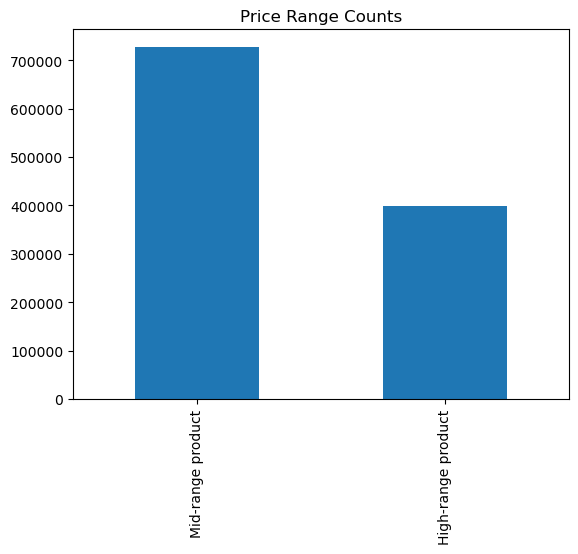

In [138]:
#Price Range for customers
bar_price_range = df_new['price_range_loc'].value_counts().plot.bar(title = 'Price Range Counts')

In [140]:
#Export Price range bar
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_counts.png')), plt.tight_layout()

(None, None)

<Figure size 640x480 with 0 Axes>

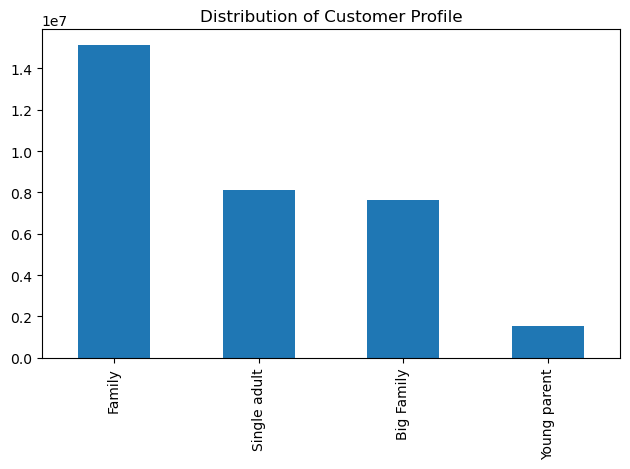

In [42]:
# Visualtization of 'distribution of family profiles'
bar_family = df_merged_clean['customer_profile'].value_counts().plot.bar(title = 'Distribution of Customer Profile'), plt.tight_layout()

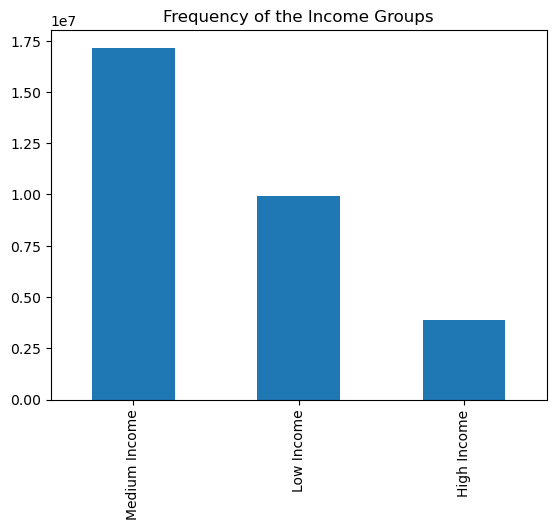

In [183]:
# creating a visualization of the 'income_groups' column
income_groups_bar=df_new['income_groups'].value_counts().plot.bar(title='Frequency of the Income Groups')

In [185]:
#Export 'income_groups' column chart
income_groups_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_groups_bar.png'),bbox_inches='tight'), plt.tight_layout

(None,
 <function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>)

In [43]:
#Exporting 'bar_family plot'
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_status.png')), plt.tight_layout()

(None, None)

<Figure size 640x480 with 0 Axes>

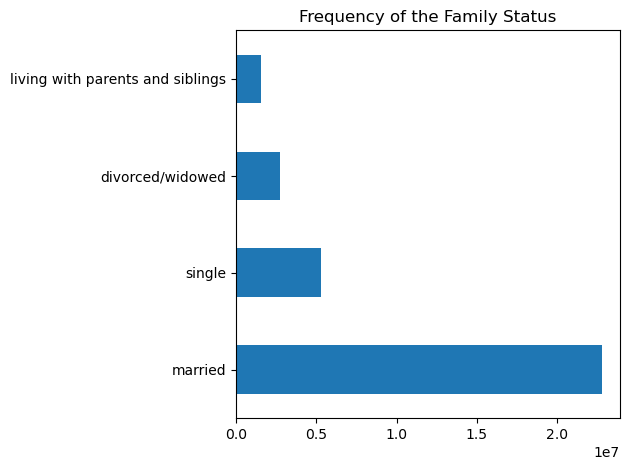

In [175]:
# creating a visualization of the 'Family_Status_Flag'
family_status_viz=df_merged_clean['fam_status'].value_counts().plot.barh(title='Frequency of the Family Status'), plt.tight_layout()

In [179]:
#Exporting 'bar_family plot'
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'frequency_family.png')), plt.tight_layout()

(None, None)

<Figure size 640x480 with 0 Axes>

In [108]:
# checking 'age_group' with 'order_frequency_flag'
age_order_freq=pd.crosstab(df_new['order_frequency_flag'],df_new['age_category'],dropna=False)

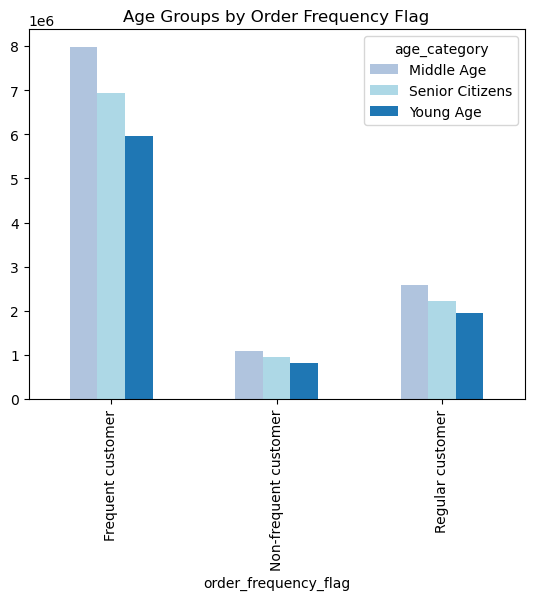

In [109]:
#bar chart for loyalty status
age_order_freq=age_order_freq.plot.bar(title='Age Groups by Order Frequency Flag',color=['lightsteelblue','lightblue','tab:blue'])

In [112]:
# exporting the above 'age_order_freq_viz' visualization
age_order_freq.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_order_freq.png'),bbox_inches='tight'), plt.tight_layout

(None,
 <function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>)

In [117]:
# creating a crosstab between 'busiest_period_of_day' and 'loyalty_flag'

loyalty_busiest_period=pd.crosstab(df_new['busiest_period_of_day'],df_new['loyalty_flag'])

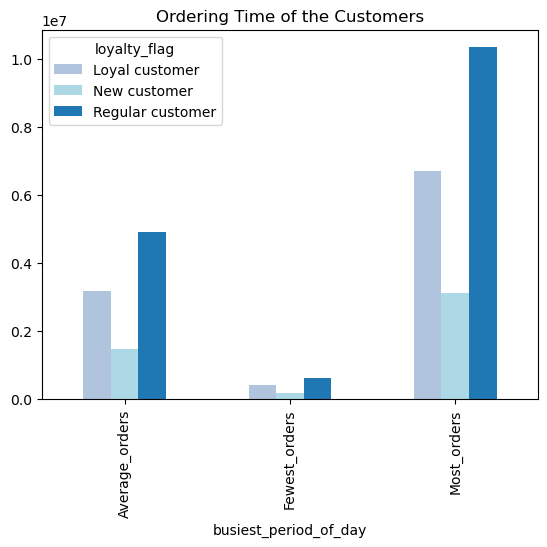

In [118]:
#Chart of Ordering time Customers
loyalty_busiest_period=loyalty_busiest_period.plot.bar(title='Ordering Time of the Customers',color=['lightsteelblue','lightblue','tab:blue'])

In [120]:
# exporting visualization
loyalty_busiest_period.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_ordering_time.png'),bbox_inches='tight'), plt.tight_layout

(None,
 <function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>)

In [152]:
# creating a crosstab between 'busiest_days' and 'loyalty_flag'
loyalty_order_days=pd.crosstab(df_merged_clean['busiest_day'],df_merged_clean['loyalty_flag'])

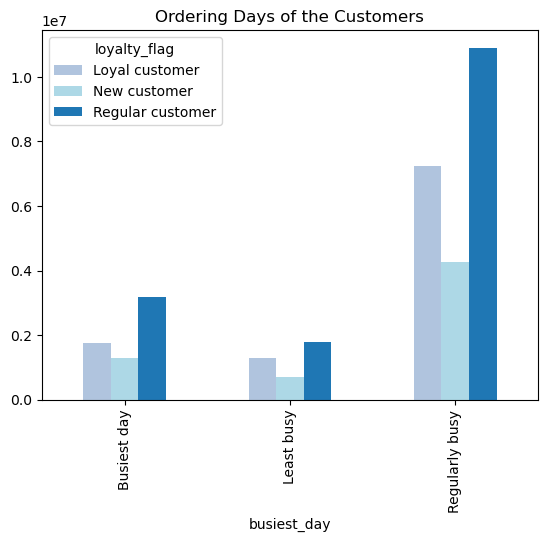

In [153]:
# creating a visualization for the 'loyalty_order_days' crosstab
loyalty_order_days=loyalty_order_days.plot.bar(title='Ordering Days of the Customers',color=['lightsteelblue','lightblue','tab:blue'])

In [155]:
# exporting the above visualization
loyalty_order_days.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_order_days.png'),bbox_inches='tight'), plt.tight_layout

(None,
 <function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>)

In [122]:
# creating a crosstab between 'spending_flag' and 'loyalty_flag'
loyalty_spending=pd.crosstab(df_new['spending_flag'],df_new['loyalty_flag'])

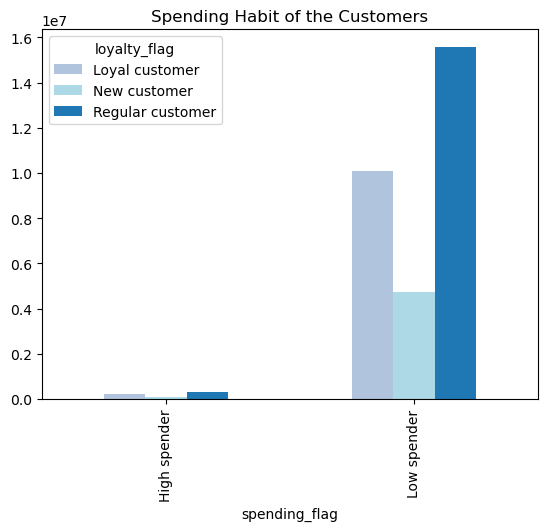

In [123]:
#Creating visualization of 'spending_flag' and 'loyalty_flag'
loyalty_spending=loyalty_spending.plot.bar(title='Spending Habit of the Customers',color=['lightsteelblue','lightblue','tab:blue'])

In [125]:
#Exporting chart
loyalty_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_spending_flag.png'),bbox_inches='tight'), plt.tight_layout

(None,
 <function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>)

# Question 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [39]:
df_merged_clean.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', '_merge'],
      dtype='object')

In [49]:
#Aggregating max, mean, min variables on customer-profile
age_cat_agg = df_merged_clean.groupby('age',) [['days_since_prior_order', 'prices']].agg(['min','max','mean'])    

In [50]:
age_cat_agg

days_since_prior_order                  prices                
                       min   max       mean    min   max      mean
age                                                               
18                     0.0  30.0  11.249329    1.0  25.0  7.806998
19                     0.0  30.0  11.026940    1.0  25.0  7.805737
20                     0.0  30.0  11.223854    1.0  25.0  7.773174
21                     0.0  30.0  10.985739    1.0  25.0  7.782344
22                     0.0  30.0  10.870718    1.0  25.0  7.784385
..                     ...   ...        ...    ...   ...       ...
77                     0.0  30.0  11.181482    1.0  25.0  7.759185
78                     0.0  30.0  11.267101    1.0  25.0  7.807197
79                     0.0  30.0  10.943151    1.0  25.0  7.776676
80                     0.0  30.0  11.016485    1.0  25.0  7.802018
81                     0.0  30.0  11.120501    1.0  25.0  7.802832

[64 rows x 6 columns]

## Income class

In [13]:
# Aggregate min. max. and mean on customer's 'income_class' for usage and expenditure.
income_class_agg = df_new.groupby('income_groups',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [52]:
income_class_agg

days_since_prior_order                  prices                
                                 min   max       mean    min   max      mean
income_groups                                                               
High Income                      0.0  30.0  10.684310    1.0  25.0  7.940833
Low Income                       0.0  30.0  10.900981    1.0  25.0  7.442144
Medium Income                    0.0  30.0  10.786682    1.0  25.0  7.957631

## Aggregating Departments

In [54]:
# Aggregate min. max. and mean on customer's 'customer_profile' for usage and expenditure.
customer_profile_agg = df_merged_clean.groupby('customer_profile',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [55]:
customer_profile_agg

days_since_prior_order                  prices        \
                                    min   max       mean    min   max   
customer_profile                                                        
Big Family                          0.0  30.0  11.118200    1.0  25.0   
Family                              0.0  30.0  11.115191    1.0  25.0   
Single adult                        0.0  30.0  11.080822    1.0  25.0   
Young parent                        0.0  30.0  11.048160    1.0  25.0   

                            
                      mean  
customer_profile            
Big Family        7.791673  
Family            7.790151  
Single adult      7.789944  
Young parent      7.800692

# Questions 08. & 09. Customers Profiles Across Regions and Departments with Visualizations

In [41]:
# Checking the relationship of 'age_category' & 'income_groups' of customers profile in differnet regions.
profile_age_reg = df_new.groupby('region')[['income_groups','age_category']].value_counts().reset_index(name='count')

In [42]:
profile_age_reg

,region,income_groups,age_category,count
0,Midwest,Medium Income,Middle Age,1654702
1,Midwest,Medium Income,Senior Citizens,1556273
2,Midwest,Low Income,Young Age,1234056
3,Midwest,Medium Income,Young Age,765283
4,Midwest,Low Income,Middle Age,700800
5,Midwest,High Income,Senior Citizens,448268
6,Midwest,High Income,Middle Age,431697
7,Midwest,Low Income,Senior Citizens,352322
8,Midwest,High Income,Young Age,19152
9,Northeast,Medium Income,Middle Age,1211085


In [14]:
# Checking income_class by regions.
region_income = pd.crosstab(df_new['income_groups'],df_merged_clean['region'], dropna = False)

In [77]:
region_income

region,Midwest,Northeast,South,West
income_groups,,,,
High Income,916998,677704,1197503,1009621
Low Income,2300620,1730055,3128019,2562635
Medium Income,4043611,3057070,5372267,4355257


(<matplotlib.legend.Legend at 0x23c2c4b1790>, None)

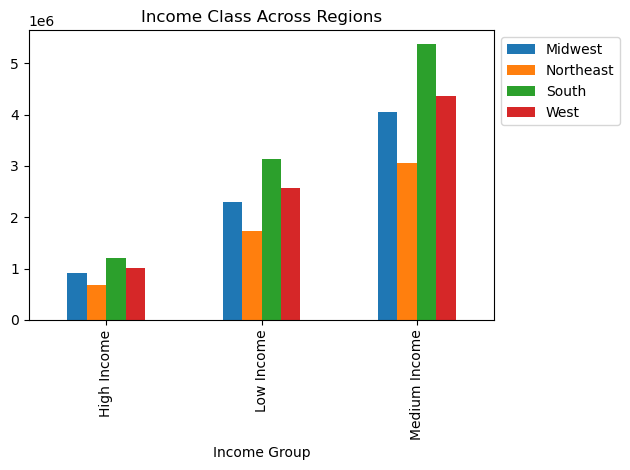

In [15]:
# Visualtization of 'income_class' and 'region'
bar_region_income = region_income.plot.bar(title = 'Income Class Across Regions')
plt.xlabel("Income Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)), plt.tight_layout()

In [6]:
# Export bar chart
bar_region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_income.png')), plt.tight_layout()

NameError: name 'bar_region_income' is not defined

In [65]:
#Create new index
new_index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [66]:
df_merged_clean.reindex(['1', '2', '3', '4', '5', '6' , '0'])

TypeError: 'list' object is not callable

In [51]:
df_merged_clean.reindex = ['1', '2', '3', '4', '5', '6' , '0']

In [52]:
df_merged_clean.reindex

['1', '2', '3', '4', '5', '6', '0']

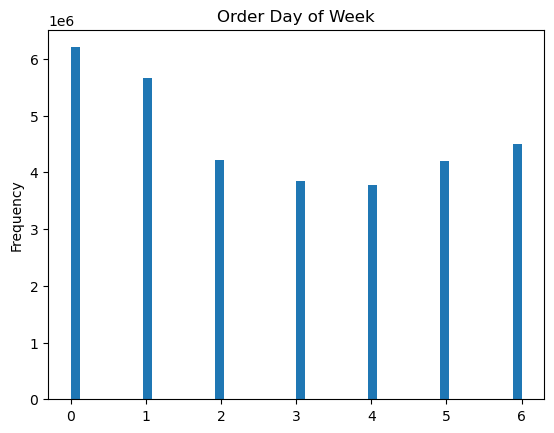

In [59]:
hist_day_of_week = df_merged_clean['order_dow'].plot.hist(bins = 50, title = 'Order Day of Week'), df_merged_clean.reindex

In [52]:
hist_day_of_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_income.png')), plt.tight_layout()

(None, None)

<Figure size 640x480 with 0 Axes>

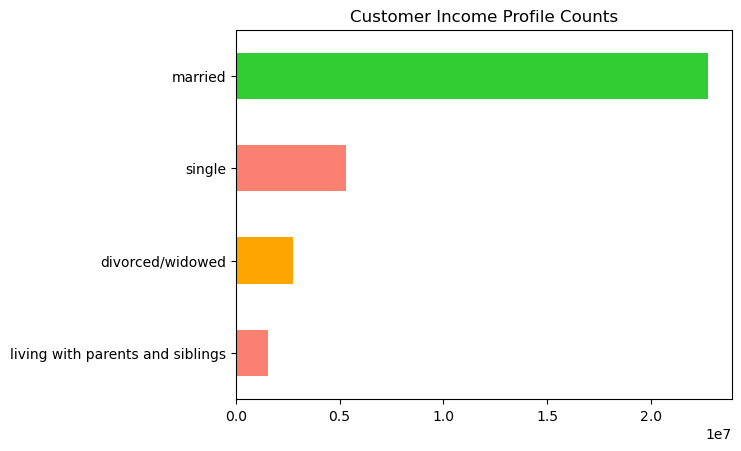

In [85]:
#Create bar chart of fam_status
bar_cust_inc_prof = df_merged_clean['fam_status'].value_counts().sort_values(ascending=True).plot.barh(color = ['salmon','orange','salmon', 'limegreen','gold', 'orange', 'gold', 'green', 'mediumblue', 'salmon','orange','green','gold','mediumblue', 'mediumblue'], title = 'Customer Income Profile Counts' )

In [86]:
#Export bar chart
bar_cust_inc_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_income.png')), plt.tight_layout()

(None, None)

<Figure size 640x480 with 0 Axes>

In [45]:
df_merged_clean.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', '_merge', 'customer_profile'],
      dtype='object')

In [46]:
df_merged.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', '_merge', 'region', 'customer_activity',
       'department'],
      dtype='object')

In [60]:
# Pivot the data to create a stacked bar chart to see relationship between 'departments' and 'customers_profile'
customer_fam_dep = df_merged.groupby(['department', 'customer_profile']).size().unstack(fill_value=0)

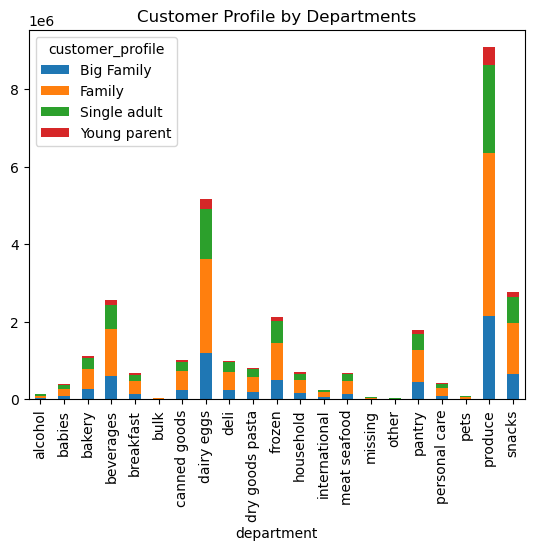

In [59]:
#stacked bar graph
stacked_cust_dept = customer_fam_dep.plot.bar(stacked = True, title = 'Customer Profile by Departments')

In [69]:
#Export stacked_cust_dept chart
stacked_cust_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_cust_dept.png')), plt.tight_layout

(None,
 <function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>)

In [23]:
df_new.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', '_merge', 'region', 'customer_activity'],
      dtype='object')

In [ ]:
# Create a crosstab to count the occurrences of age categories in each department
cross_tab = pd.crosstab(df_new['department'], df_new['age_category'])

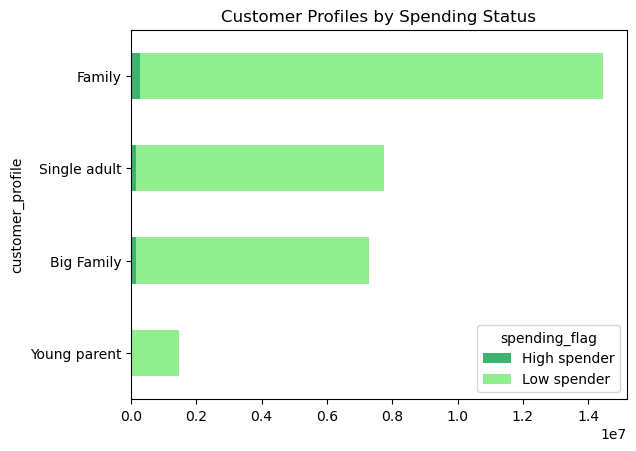

In [49]:
# Group customer profile and spending flag

cust_prof_spending = df_merged.groupby(['customer_profile', 'spending_flag']).size().unstack()

# Sort

cust_prof_spending = cust_prof_spending.loc[cust_prof_spending.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_prof_spending = cust_prof_spending.plot.barh(stacked = True, color = ['mediumseagreen', 'lightgreen'], title = 'Customer Profiles by Spending Status')

In [50]:
#Export
bar_cust_prof_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_cust_dept.png')), plt.tight_layout

(None,
 <function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>)

In [71]:
df_merged.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', '_merge', 'region', 'customer_activity',
       'department', 'customer_profile'],
      dtype='object')

In [72]:
df_merged_clean.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', '_merge', 'customer_profile'],
      dtype='object')

In [65]:
df_new.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', '_merge', 'region', 'customer_activity'],
      dtype='object')

In [8]:
# Exporting Dataframe.
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_dept_final_merged.pkl'))